# Usuarios y Tweets de Junio y Agosto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
import numpy 
import time


## Levantamos todo en pala

In [2]:
start = time.time()
df_users_junio =  pd.read_csv('data/users_junio.csv', parse_dates=['created_at'])
end = time.time()
print("Finaliza df_users_junio:", end - start, "segundos")

start = time.time()
df_users_agosto =  pd.read_csv('data/users_agosto.csv', parse_dates=['created_at'])
end = time.time()
print("Finaliza df_users_agosto:", end - start, "segundos")

start = time.time()
df_tweets_junio =  pd.read_csv('data/tweets_junio.csv', parse_dates=['created_at'])
end = time.time()
print("Finaliza df_tweets_junio:", end - start, "segundos")

start = time.time()
df_tweets_agosto =  pd.read_csv('data/tweets_agosto.csv', parse_dates=['created_at'])
end = time.time()
print("Finaliza df_tweets_agosto:", end - start, "segundos")


Finaliza df_users_junio: 87.52822303771973 segundos
Finaliza df_users_agosto: 19.29053521156311 segundos
Finaliza df_tweets_junio: 263.9377193450928 segundos
Finaliza df_tweets_agosto: 29.65857195854187 segundos


In [3]:
uj = len(df_users_junio)
ua = len(df_users_agosto)
tj = len(df_tweets_junio)
ta = len(df_tweets_agosto)

print("Cantidad de registros")
print("Usuarios Junio: ", uj) 
print("Usuarios Agosto: ", ua) 
print("Tweets Junio: ", tj) 
print("Tweets Agosto: ", ta) 


Cantidad de registros
Usuarios Junio:  329782
Usuarios Agosto:  74324
Tweets Junio:  1041585
Tweets Agosto:  120902


In [4]:
print(tj / uj)

3.1584046430672386


In [5]:
print(ta / ua)

1.626688552822776


### Merge de Agosto df_agosto = (tweets + usuarios)

In [4]:
df_agosto = pd.merge(df_tweets_agosto, df_users_agosto, left_on = 'user_id', right_on = 'id', how='left')

In [5]:
df_agosto[df_agosto.followers_count > 1000000].sort_values('followers_count',  ascending=False)[:5]

,id_x,created_at_x,favorite_count,retweet_count,text,favorited,retweeted,user_name,user_id,original_id,...,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at_y,id_y,name,verified
24272,1025211470773141510,2018-08-03 02:47:16+00:00,0,0,"RT @CNNArgentina: Aborto en Argentina: ""Se red...",False,False,CNN en Español,33884545,1025211470773141510,...,En todas partes,16627820,152951,CNN en Español es tu principal fuente de infor...,825,1354,2009-04-21 12:14:47+00:00,33884545,CNN en Español,True
106872,1025408340711469056,2018-08-03 15:49:34+00:00,0,0,Hace 15 años cumplia el gran sueño de mi vida ...,False,False,Javier Mascherano,313913938,1025408340711469056,...,"Beijing, China",8019048,1094,http://www.facebook.com/Javier14Mascherano,247,45,2011-06-09 12:23:45+00:00,313913938,Javier Mascherano,True
90434,1025390834542202881,2018-08-03 14:40:00+00:00,0,0,“Con c de campeón y c de cocinera”: campaña de...,False,False,Noticias Caracol,17813487,1025390834542202881,...,Colombia,8001172,561422,Primero en Noticias.,2042,2986,2008-12-02 17:58:53+00:00,17813487,Noticias Caracol,True
88677,1025388825458225154,2018-08-03 14:32:01+00:00,0,0,Senado votará sin cambios proyecto para legali...,False,False,La Patilla,124172948,1025388825458225154,...,Venezuela,6773436,4219776,Información e Investigación. También puedes en...,148,587,2010-03-18 14:02:00+00:00,124172948,La Patilla,True
60135,1025351852165160960,2018-08-03 12:05:06+00:00,0,0,#3Ago | ANC estudiará despenalizar el aborto y...,False,False,Globovisión,17485551,1025351852165160960,...,Venezuela,4763443,1215368,"#Globovisión, información responsable y veraz....",2611,638,2008-11-19 13:22:39+00:00,17485551,Globovisión,True


In [6]:
df_agosto[df_agosto.user_id == 33884545]

,id_x,created_at_x,favorite_count,retweet_count,text,favorited,retweeted,user_name,user_id,original_id,...,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at_y,id_y,name,verified
24272,1025211470773141510,2018-08-03 02:47:16+00:00,0,0,"RT @CNNArgentina: Aborto en Argentina: ""Se red...",False,False,CNN en Español,33884545,1025211470773141510,...,En todas partes,16627820,152951,CNN en Español es tu principal fuente de infor...,825,1354,2009-04-21 12:14:47+00:00,33884545,CNN en Español,True


### Merge de Junio df_junio = (tweets + usuarios)

In [7]:
df_junio = pd.merge(df_tweets_junio, df_users_junio, left_on = 'user_id', right_on = 'id', how='left')

In [8]:
df_junio[df_junio.followers_count > 100000].sort_values('followers_count',  ascending=False).count()

id_x                2257
created_at_x        2257
favorite_count      2257
retweet_count       2257
full_text           2257
posicion            2257
favorited           2257
retweeted           2257
user_name           2257
user_id             2257
original_id         2257
screen_name         2257
location            1696
followers_count     2257
statuses_count      2257
description         2093
friends_count       2257
favourites_count    2257
created_at_y        2257
id_y                2257
name                2257
verified            2257
dtype: int64

In [9]:
df_junio[df_junio.followers_count == df_junio.followers_count.max()]

,id_x,created_at_x,favorite_count,retweet_count,full_text,posicion,favorited,retweeted,user_name,user_id,...,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at_y,id_y,name,verified
86727,1006322670164733952,2018-06-11 23:49:55+00:00,0,7722,RT @marley_ok: Argentina tiene que avanzar! El...,si,False,False,marcelo tinelli,789856765,...,Buenos aires,10265980,52999,"Periodista, Productor de Contenidos Multimedia...",379,12625,2012-08-29 18:05:27+00:00,789856765,marcelo tinelli,True
266213,1006305004561592320,2018-06-11 22:39:43+00:00,0,4651,"RT @ElchuecoSuar: El aborto existió, existe y ...",si,False,False,marcelo tinelli,789856765,...,Buenos aires,10265980,52999,"Periodista, Productor de Contenidos Multimedia...",379,12625,2012-08-29 18:05:27+00:00,789856765,marcelo tinelli,True


In [10]:
df_agosto[df_agosto.followers_count == df_agosto.followers_count.max()]

,id_x,created_at_x,favorite_count,retweet_count,text,favorited,retweeted,user_name,user_id,original_id,...,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at_y,id_y,name,verified
24272,1025211470773141510,2018-08-03 02:47:16+00:00,0,0,"RT @CNNArgentina: Aborto en Argentina: ""Se red...",False,False,CNN en Español,33884545,1025211470773141510,...,En todas partes,16627820,152951,CNN en Español es tu principal fuente de infor...,825,1354,2009-04-21 12:14:47+00:00,33884545,CNN en Español,True


In [11]:
df_tweets_junio[df_tweets_junio.id != df_tweets_junio.original_id ]

,id,created_at,favorite_count,retweet_count,full_text,posicion,favorited,retweeted,user_name,user_id,original_id


###  Folowers vs retweets

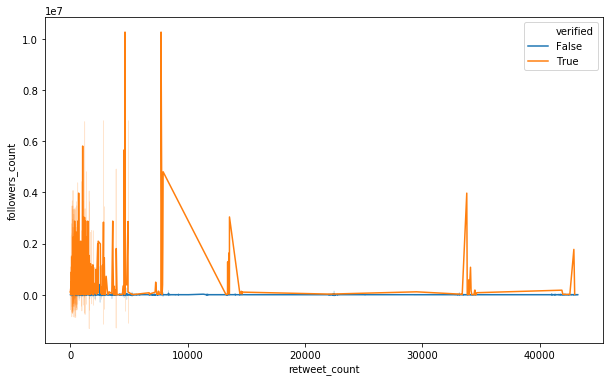

In [21]:
#df_junio.followers_count vs df_junio.retweet_count
plt.figure(figsize=(10,6))
sns.lineplot(data=df_junio,
                  x='retweet_count', y='followers_count',
                  hue='verified', ci='sd')


In [12]:
df_tweets_junio[df_tweets_junio.id == df_tweets_junio.original_id ].count()

id                1041585
created_at        1041585
favorite_count    1041585
retweet_count     1041585
full_text         1041585
posicion          1041585
favorited         1041585
retweeted         1041585
user_name         1041529
user_id           1041585
original_id       1041585
dtype: int64

In [13]:
df_users_junio[df_users_junio.verified].followers_count.describe()

count    7.320000e+02
mean     2.342490e+05
std      7.135501e+05
min      1.660000e+02
25%      1.054825e+04
50%      3.019850e+04
75%      1.273585e+05
max      1.026598e+07
Name: followers_count, dtype: float64

In [14]:
df_users_agosto[df_users_agosto.verified].followers_count.describe()

count    3.780000e+02
mean     4.410036e+05
std      1.293390e+06
min      3.230000e+02
25%      1.883500e+04
50%      5.835650e+04
75%      2.859568e+05
max      1.662782e+07
Name: followers_count, dtype: float64

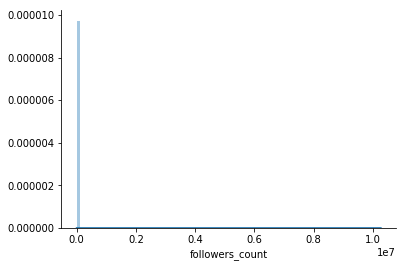

In [44]:
sns.distplot(df_users_junio['followers_count'], bins=100)
sns.despine()

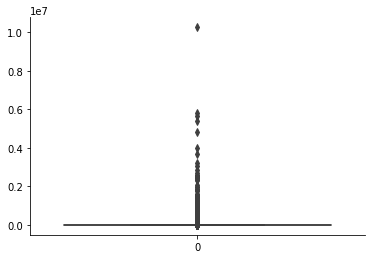

In [45]:
sns.boxplot(data=df_users_junio['followers_count'])
sns.despine()

In [65]:
promedio_tweets_uv = df_junio[df_junio['verified']].groupby('user_id').count()['id_x'].mean()
promedio_tweets_unv = df_junio[df_junio['verified'] != True].groupby('user_id').count()['id_x'].mean()

print(promedio_tweets_uv, promedio_tweets_unv)


6.743169398907104 3.1504300258319407


In [68]:
df_tweets_agosto[df_tweets_agosto.id == df_tweets_agosto.original_id ].describe()

,id,favorite_count,retweet_count,user_id,original_id
count,1.209020e+05,120902.0,120902.0,1.209020e+05,1.209020e+05
mean,1.025314e+18,0.0,0.0,2.556739e+17,1.025314e+18
std,8.503283e+13,0.0,0.0,4.092247e+17,8.503283e+13
min,1.025181e+18,0.0,0.0,7.802810e+05,1.025181e+18
25%,1.025220e+18,0.0,0.0,3.366145e+08,1.025220e+18
50%,1.025353e+18,0.0,0.0,1.737213e+09,1.025353e+18
75%,1.025391e+18,0.0,0.0,7.526667e+17,1.025391e+18
max,1.025420e+18,0.0,0.0,1.025411e+18,1.025420e+18


In [44]:
 df_users_agosto.head(10)


,screen_name,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at,id,name,verified
0,abortoensenado,"Buenos Aires, Argentina",619,1028,Sólo hay una cosa más grande que el amor a la ...,1264,305,2018-06-20 17:12:43+00:00,1009484201660383232,Aborto En El Senado,False
1,MotonetaZ,NaN,12,265,None,66,189,2017-06-15 20:07:02+00:00,875444558745567232,Lucas,False
2,AliseValix0210,NaN,34,3218,"ARMY ,❤ BTS ❤, HAY QUE AMARLOS A TODOS.",92,5076,2017-11-20 23:30:37+00:00,932753072681517058,Alise,False
3,MilenaDiser27,NaN,28,106,artist👩🏻‍🎨🎸🎶 🖤AHS🖤 cuenta nueva🤙🏽🔥 snap👻: mile...,114,113,2018-06-11 01:46:56+00:00,1005989729542733827,FREAK👽,False
4,ConLaGenteRos,"Rosario, Argentina",2325,15230,Diario digital de Rosario,449,28,2017-12-10 21:06:45+00:00,939964624711057412,Con La Gente,False
5,MelinaAlmada5,Matorrales,167,2519,La revolución será feminista o no será,147,1473,2017-09-28 01:54:38+00:00,913220372136329221,ᗰEᒪIᑎᗩ 💚💜💚,False
6,candv6,makdonalS,1763,2194,re torta y?,5001,1954,2018-02-26 21:16:48+00:00,968233410870247430,cande;,False
7,CharlyCarlos10,"Salta, Argentina",115,5092,None,103,25907,2016-06-21 17:10:24+00:00,745302861815349249,Charly I.,False
8,agusnhh,sAnmi,371,16080,23 h 06 n,428,10395,2017-12-29 22:25:34+00:00,946869830241615880,kumbia peposa 🇫🇷,False
9,Ivanlorenz_,NaN,384,7714,Egresado del Colegio Nacional de Buenos Aires ...,380,6530,2016-02-25 23:00:20+00:00,702991546208092169,Lolo,False


In [84]:
import numpy.distutils.system_info as sysinfo
print("Version de numpy!",sysinfo.platform_bits , "bits")

Version de numpy! 64 bits


In [12]:
type(df_tweets_agosto)

pandas.core.frame.DataFrame

In [14]:
df_tweets_agosto.describe()


,id,favorite_count,retweet_count,user_id,original_id
count,1.209020e+05,120902.0,120902.0,1.209020e+05,1.209020e+05
mean,1.025314e+18,0.0,0.0,2.556739e+17,1.025314e+18
std,8.503283e+13,0.0,0.0,4.092247e+17,8.503283e+13
min,1.025181e+18,0.0,0.0,7.802810e+05,1.025181e+18
25%,1.025220e+18,0.0,0.0,3.366145e+08,1.025220e+18
50%,1.025353e+18,0.0,0.0,1.737213e+09,1.025353e+18
75%,1.025391e+18,0.0,0.0,7.526667e+17,1.025391e+18
max,1.025420e+18,0.0,0.0,1.025411e+18,1.025420e+18


In [23]:
print(df_junio.shape, df_tweets_junio.shape)

(1041585, 22) (1041585, 11) (329782, 11)


In [24]:
print(df_agosto.shape, df_tweets_agosto.shape)

(120902, 21) (120902, 10)


In [28]:
print(df_junio.followers_count.min(), df_junio.followers_count.max())

0 10265980


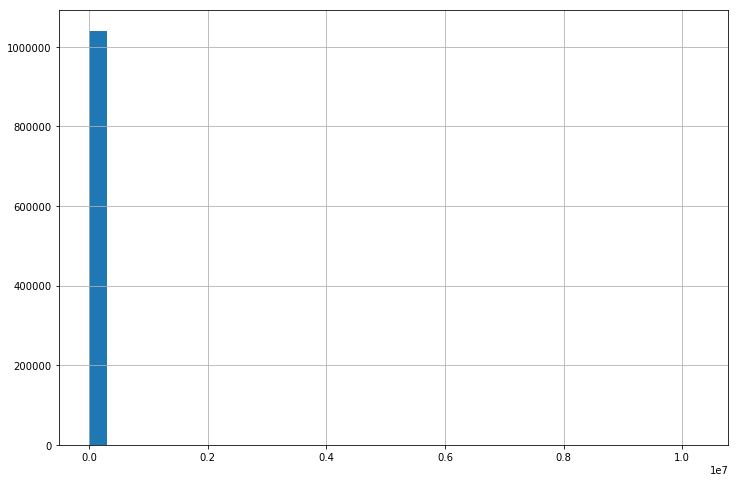

In [35]:
df_junio.followers_count.hist( bins=35, figsize=(12,8));

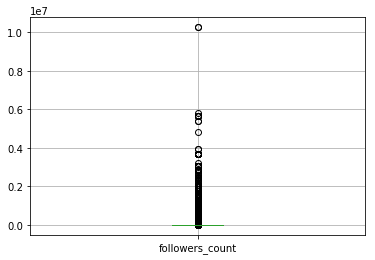

In [30]:
df_junio.boxplot(column='followers_count');

### Usuarios (no duplicados)
Quitamos los duplicados por la columna ID, y unimos los 2 datasets en uno de usuarios.

In [13]:
df_users = pd.concat([df_users_junio, df_users_agosto]).drop_duplicates(subset='id').reset_index(drop=True)

In [65]:
print('filas:',df_users.shape[0], '=',df_users_junio.shape[0], '+' , df_users_agosto.shape[0] )
print('duplicados:', (df_users_junio.shape[0] + df_users_agosto.shape[0]) - df_users.shape[0])

filas: 370486 = 329782 + 74324
duplicados: 33620


In [79]:
fw = df_users['followers_count']
mask_fw = numpy.abs(fw-fw.mean()) <= (1.5*fw.std())
data =fw[mask_fw]
print("Filas removidas", fw.count() - data.count())
print("Folowers máximo considerado", data.max())

Filas removidas 734
Folowers máximo considerado 85425


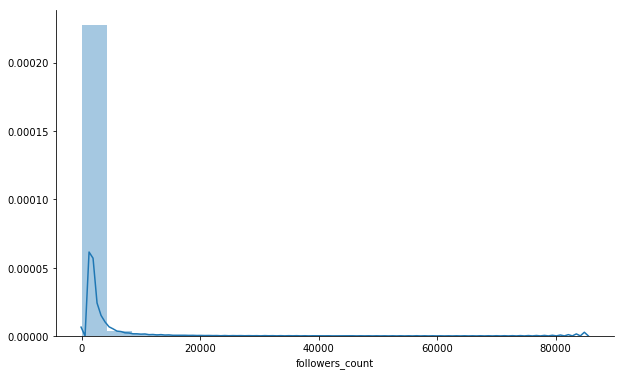

In [80]:
plt.figure(figsize=(10,6))
sns.distplot(data, bins=20)
sns.despine()

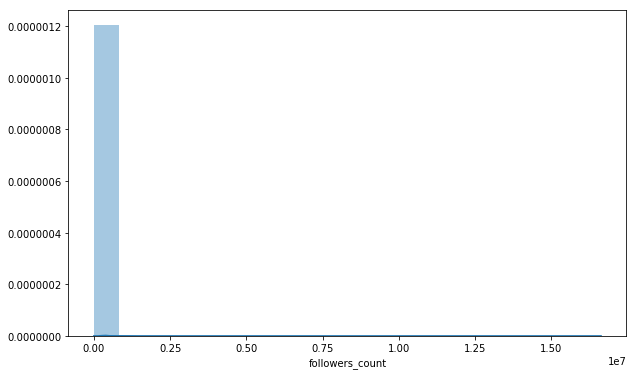

In [103]:
plt.figure(figsize=(10,6))
sns.distplot(df_users['followers_count'], bins=20)


### Seguidores y seguidos

El 75% de los usuarios, tiene en promedio 748 seguidores

In [110]:
df_users['followers_count'].quantile(q=[.25,.5,.75])

0.25    114.0
0.50    323.0
0.75    748.0
Name: followers_count, dtype: float64

In [104]:
 df_users['followers_count'].describe()

count    3.704860e+05
mean     1.979009e+03
std      5.567966e+04
min      0.000000e+00
25%      1.140000e+02
50%      3.230000e+02
75%      7.480000e+02
max      1.662782e+07
Name: followers_count, dtype: float64

In [136]:
df_users['followers_count'].quantile(q=[.998245])

0.998245    100224.55065
Name: followers_count, dtype: float64

In [138]:
print('El ',100 - 99.8245,'% de los usuarios tiene + de 100 mil seguidores!' )

El  0.17549999999999955 % de los usuarios tiene + de 100 mil seguidores!


#### ahora vamos con los amigos (a quien sigue)

In [145]:
 df_users['friends_count'].describe()

count    3.704860e+05
mean     7.186879e+02
std      3.874823e+03
min      0.000000e+00
25%      1.850000e+02
50%      3.680000e+02
75%      7.170000e+02
max      1.047219e+06
Name: friends_count, dtype: float64

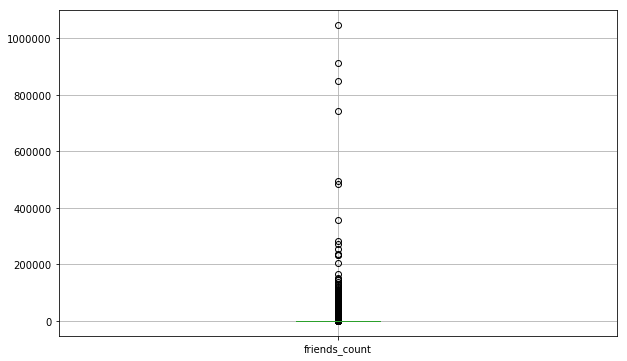

In [146]:
 df_users.boxplot(column='friends_count');

In [147]:
df_users['friends_count'].quantile(q=[.25,.5,.75])

0.25    185.0
0.50    368.0
0.75    717.0
Name: friends_count, dtype: float64

## Pregunta Nro 2 (creacion de cuentas)

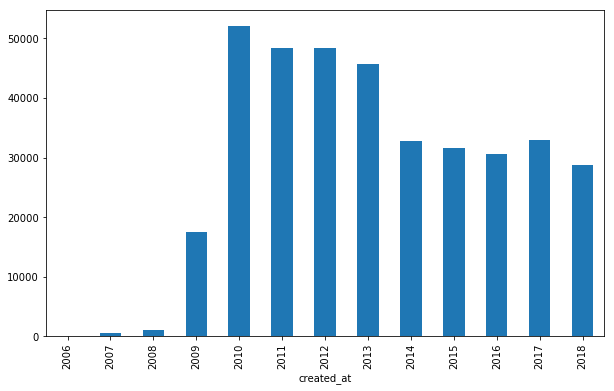

In [148]:
df_users["created_at"].groupby(df_users["created_at"].dt.year).count().plot(kind="bar")
plt.show()

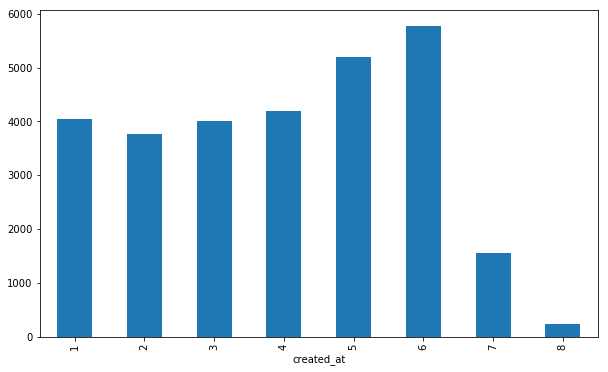

In [151]:
import datetime 
df_users[df_users["created_at"].dt.year >= 2018]["created_at"].groupby(df_users["created_at"].dt.month).count().plot(kind="bar")
plt.show()

#### Si vemos una alza en altas  en los meses de mayo y junio!

In [158]:
df_users[df_users["created_at"].dt.year >= 2018].groupby(df_users["created_at"].dt.month)['id'].count()


created_at
1    4046
2    3773
3    4016
4    4187
5    5189
6    5775
7    1558
8     238
Name: id, dtype: int64

## Antigüedad vs cantidad de tweets

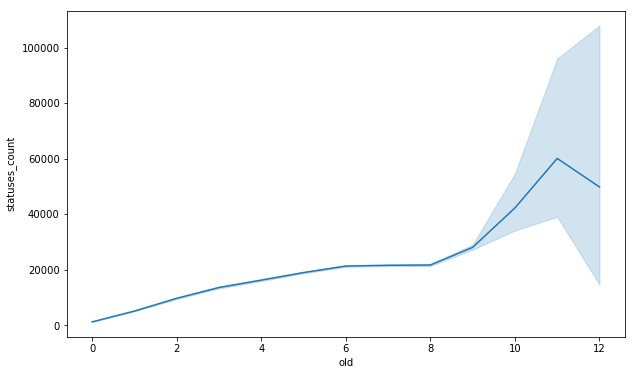

In [192]:
df_users['old'] =  2018 - df_users["created_at"].dt.year
sns.lineplot(data=df_users, x='old',y='statuses_count')

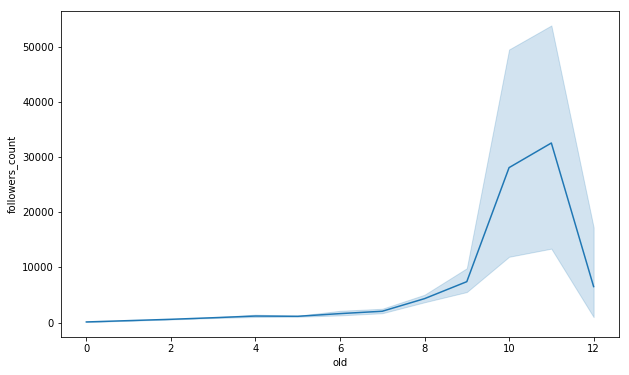

In [196]:
sns.lineplot(data=df_users, x='old',y='followers_count')
 

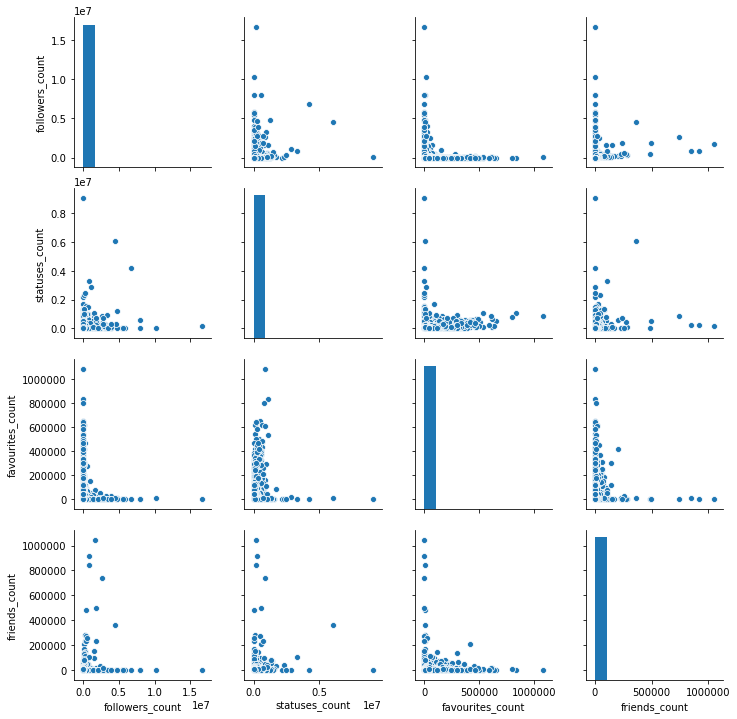

In [198]:
sns.pairplot(
    data=df_users,
    vars=['followers_count', 'statuses_count', 'favourites_count', 'friends_count'])

sns.despine()

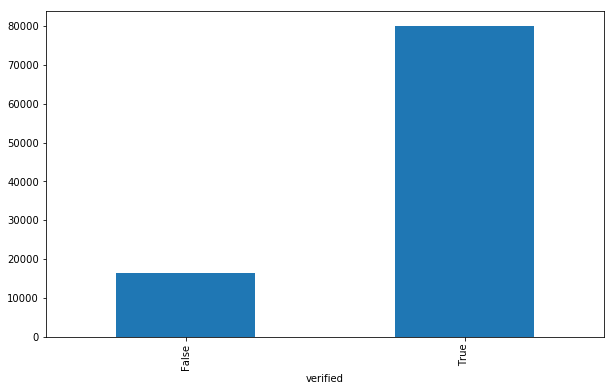

In [204]:
df_users.groupby(df_users["verified"])['statuses_count'].mean().plot(kind="bar")
plt.show()


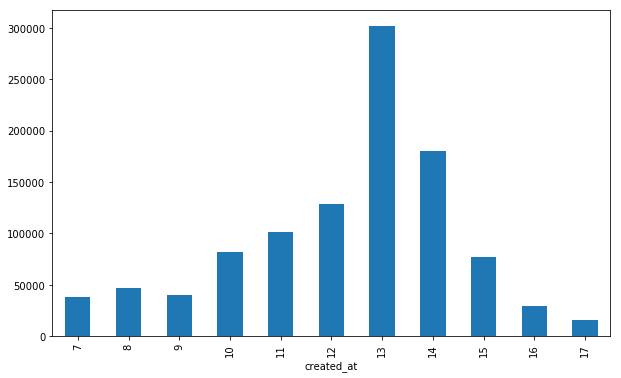

In [209]:
df_tweets_junio["created_at"].groupby(df_tweets_junio["created_at"].dt.day).count().plot(kind="bar")
plt.show()

### Cantidad de tweets x hora de creacion (dia de la votacion en junio y agosto)

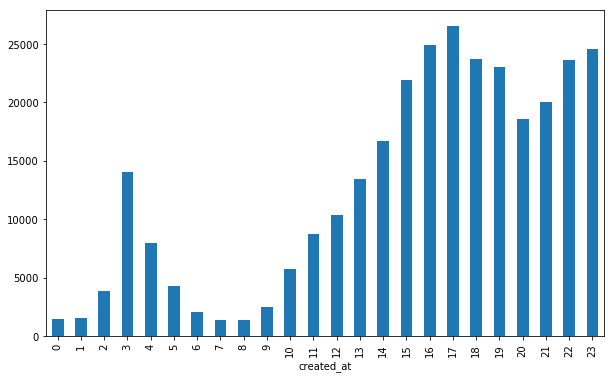

In [212]:
df_tweets_junio[df_tweets_junio.created_at.dt.day == 13]["created_at"].groupby(df_tweets_junio["created_at"].dt.hour).count().plot(kind="bar")
plt.show()

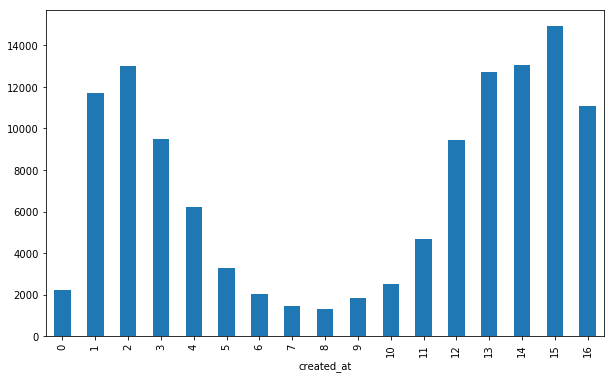

In [211]:
df_tweets_agosto["created_at"].groupby(df_tweets_agosto["created_at"].dt.hour).count().plot(kind="bar")
plt.show()

In [219]:
def to_categorical(column):
    intervals = pd.IntervalIndex.from_tuples([(0, 100), (100, 500), (500, 1000), (1000,5000), (5000,10000),(10000,20000),(20000,50000),(50000, 100000), (100000, 200000), (200000, 500000), (500000,1000000), (1000000,20000000)])
    return pd.cut(column, intervals)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

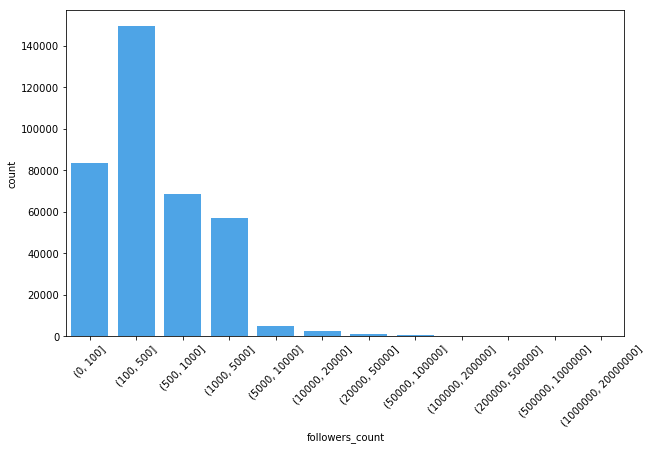

In [221]:
sns.countplot(to_categorical(df_users.followers_count), color='#35A7FF')
plt.xticks(rotation=45)

### usuarios verificados y no verificados vs seguidores

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

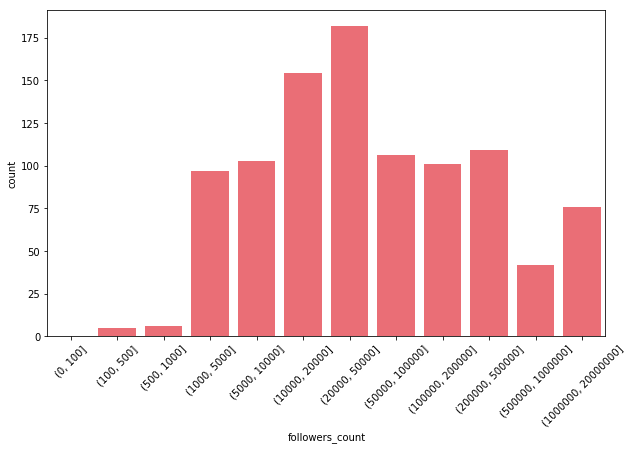

In [229]:
sns.countplot(to_categorical(df_users[df_users.verified == True].followers_count), color='#FF5964')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

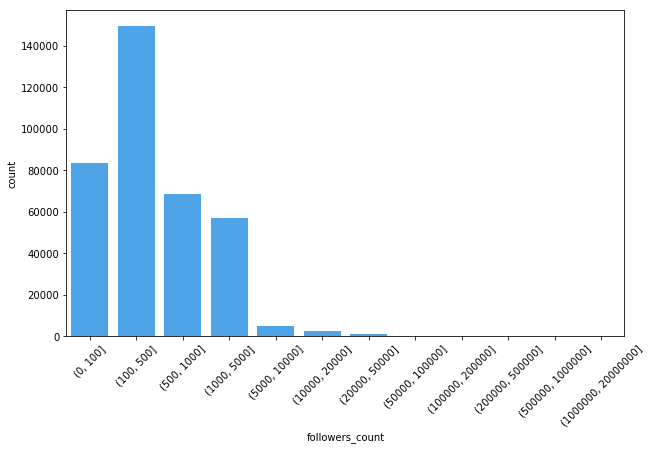

In [231]:
sns.countplot(to_categorical(df_users[df_users.verified == False].followers_count), color='#35A7FF')
plt.xticks(rotation=45)

### El tweet con mas RT
una lastima que esta cuenta esté bloqueda, no podemos ver lo que ha tweeteado.
https://twitter.com/user/status/[tweet_id]


In [38]:
 

#df_tweets_junio[df_tweets_junio.retweet_count==df_tweets_junio.retweet_count.max()] #--43247 retweets y sin fav?
#user_id == 2920325639
df_users_junio[df_users_junio.id == 2920325639]

#df_tweets_junio[df_tweets_junio.favorite_count == df_tweets_junio.favorite_count.max()] #--51902
#user_id == 800070291225350144
#df_users_junio[df_users_junio.id == 800070291225350144]

,screen_name,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at,id,name,verified
25641,Fio_Mansilla,Pergamino-Bs.As-Argentina,350,10133,El lujo es vulgaridad✨,344,3728,2014-12-13 21:11:00+00:00,2920325639,Fio👑,False


## Series temportales con Pandas

In [40]:
tfav = pd.Series(data=df_tweets_junio['favorite_count'].values, index=df_tweets_junio['created_at'])
tret = pd.Series(data=df_tweets_junio['retweet_count'].values, index=df_tweets_junio['created_at'])

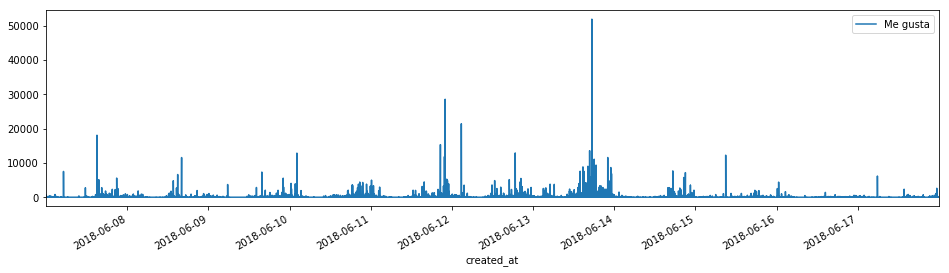

In [42]:
tfav.plot(figsize=(16,4), label="Me gusta", legend=True)


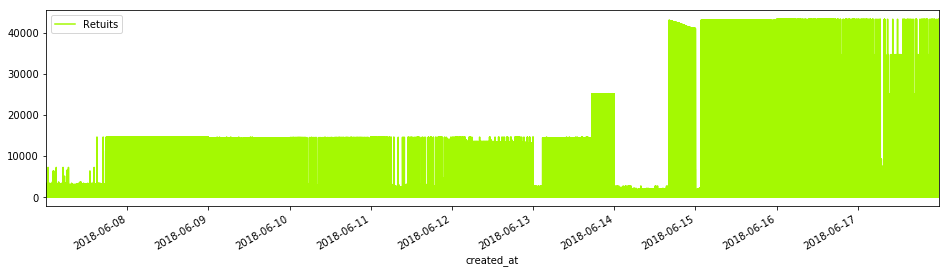

In [44]:
tret.plot(figsize=(16,4), label="Retuits", legend=True, color='#a4f902');

## Hipotesis nula (correlacion entre followers y cuentas verificadas)

In [36]:
#df_users.head(4) #followers_count vs verified
#los que tienen cuenta verificada, tienen mas followers? H0
df_agosto.head(4)

,id_x,created_at_x,favorite_count,retweet_count,text,favorited,retweeted,user_name,user_id,original_id,...,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at_y,id_y,name,verified
0,1025181421961392135,2018-08-03 00:47:52+00:00,0,0,🔹 5 Mitos sobre el aborto que todos debemos sa...,False,False,Revista Digital,2208347839,1025181421961392135,...,España,626,86274,Seleccionamos y publicamos contenidos interesa...,1357,24,2013-11-22 05:02:08+00:00,2208347839,Revista Digital,False
1,1025181422347268097,2018-08-03 00:47:52+00:00,0,0,RT @antotripelli: Mi mamá hablando con una ami...,False,False,Mimi,878157175,1025181422347268097,...,Argentina,743,25018,TMR Eragon THG.lll. Kevsho,834,8385,2012-10-13 16:07:51+00:00,878157175,Mimi,False
2,1025181423639113728,2018-08-03 00:47:53+00:00,0,0,El aborto que se perdió tu vieja jajajajajajaj...,False,False,Delfina💚,984930721373573120,1025181423639113728,...,NaN,226,6290,Otra vez te tocó perder hoy te fuiste andá a s...,232,3851,2018-04-13 23:05:57+00:00,984930721373573120,Delfina💚,False
3,1025181426361221120,2018-08-03 00:47:53+00:00,0,0,RT @cortalabochx: Si se legaliza el aborto los...,False,False,Mr. Drama👑,630668646,1025181426361221120,...,Friendzone,1530,78872,Acuario ♒ [ 9 . 45 ] Hijx de tigre ∆,545,14748,2012-07-08 22:55:14+00:00,630668646,Mr. Drama👑,False


## Verificadas vs No Verificadas

In [30]:
#df_junio.head(4)
df_junio.groupby('verified')['statuses_count','followers_count','friends_count','favourites_count'].describe().T

verified                       False         True 
statuses_count   count  1.036649e+06  4.936000e+03
                 mean   2.353457e+04  7.548874e+04
                 std    4.563988e+04  8.247659e+04
                 min    1.000000e+00  7.900000e+01
                 25%    2.233000e+03  1.736075e+04
                 50%    9.020000e+03  4.564600e+04
                 75%    2.614600e+04  1.303880e+05
                 max    1.695897e+06  1.077103e+06
followers_count  count  1.036649e+06  4.936000e+03
                 mean   1.471226e+03  2.123265e+05
                 std    1.386494e+04  6.121010e+05
                 min    0.000000e+00  1.660000e+02
                 25%    1.320000e+02  1.351400e+04
                 50%    3.820000e+02  3.051600e+04
                 75%    9.310000e+02  1.092790e+05
                 max    2.333095e+06  1.026598e+07
friends_count    count  1.036649e+06  4.936000e+03
                 mean   8.988756e+02  5.182923e+03
                 std    2.644527e+03  2.013487e+04
                 min    0.000000e+00  0.000000e+00
                 25%    2.070000e+02  8.452500e+02
                 50%    4.300000e+02  1.188000e+03
                 75%    9.070000e+02  2.153000e+03
                 max    8.467440e+05  7.416320e+05
favourites_count count  1.036649e+06  4.936000e+03
                 mean   1.366806e+04  2.773804e+04
                 std    3.007152e+04  3.450975e+04
                 min    0.000000e+00  0.000000e+00
                 25%    1.316000e+03  2.609000e+03
                 50%    4.927000e+03  1.149950e+04
                 75%    1.430400e+04  4.964600e+04
                 max    1.084250e+06  6.149670e+05

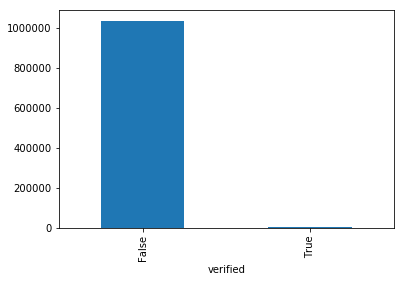

In [34]:
df_junio['verified'].groupby(df_junio['verified']).count().plot(kind="bar")

In [114]:
df_temp = df_users_junio[['id','verified']]
df_temp['verified_n'] = numpy.where(df_temp['verified']==True, 1, 0) #devuelve SettingWithCopyWarning
#df_temp[df_temp.verified_n == 1] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Cantidad de tweets por usuario

In [129]:
df_temp_tweets = df_tweets_junio[['user_id','retweet_count']].groupby('user_id').count().reset_index(drop=False)

In [138]:
df_simple = pd.merge(df_temp,df_temp_tweets,left_on = 'id', right_on = 'user_id')
del df_simple['verified']
del df_simple['id']
df_simple.columns = ['verified', 'user_id', 'tweet_count']

In [140]:
df_simple.head(2)

,verified,user_id,tweet_count
0,0,19398656,4
1,0,791841268879851520,1


In [144]:
df_tweets_junio[df_tweets_junio.user_id == 19398656]['id'].count()

4

In [145]:
df_simple

,verified,user_id,tweet_count
count,329782.000000,3.297820e+05,329782.000000
mean,0.002220,2.015184e+17,3.158405
std,0.047061,3.714398e+17,8.758616
min,0.000000,3.971000e+03,1.000000
25%,0.000000,3.075110e+08,1.000000
50%,0.000000,1.364068e+09,1.000000
75%,0.000000,4.364369e+09,3.000000
max,1.000000,1.008494e+18,726.000000


In [157]:
df_simple.groupby('verified').tweet_count.mean()

verified
0    3.150430
1    6.743169
Name: tweet_count, dtype: float64

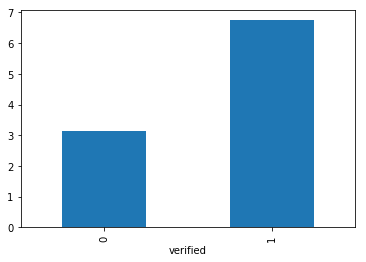

In [158]:
df_simple.groupby('verified').tweet_count.mean().plot(kind="bar")

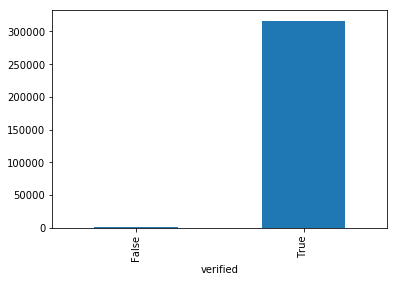

In [162]:
df_users.groupby('verified').followers_count.mean().plot(kind="bar")

In [163]:
df_users.groupby('verified').followers_count.mean()

verified
False      1143.920956
True     316524.712538
Name: followers_count, dtype: float64

In [168]:
df_tweets_junio.columns

Index(['id', 'created_at', 'favorite_count', 'retweet_count', 'full_text',
       'posicion', 'favorited', 'retweeted', 'user_name', 'user_id',
       'original_id'],
      dtype='object')

In [169]:
df_tweets_agosto.columns

Index(['id', 'created_at', 'favorite_count', 'retweet_count', 'text',
       'favorited', 'retweeted', 'user_name', 'user_id', 'original_id'],
      dtype='object')

In [173]:
df_users_junio.columns

Index(['screen_name', 'location', 'followers_count', 'statuses_count',
       'description', 'friends_count', 'favourites_count', 'created_at', 'id',
       'name', 'verified'],
      dtype='object')

In [181]:
df_u_j = df_users_junio[['id','followers_count', 'statuses_count','friends_count', 'favourites_count','verified']]

In [182]:
df_u_a = df_users_agosto[['id','followers_count', 'statuses_count','friends_count', 'favourites_count','verified']]

In [183]:
df_u = pd.concat([df_u_j, df_u_a]).drop_duplicates(subset='id').reset_index(drop=True)

In [184]:
df_u.describe().T

,count,mean,std,min,25%,50%,75%,max
id,370486.0,2.082670e+17,3.768441e+17,3971.0,3.108181e+08,1.401110e+09,4.636328e+09,1.025411e+18
followers_count,370486.0,1.979009e+03,5.567966e+04,0.0,1.140000e+02,3.230000e+02,7.480000e+02,1.662782e+07
statuses_count,370486.0,1.655812e+04,3.969058e+04,1.0,1.590000e+03,6.632000e+03,1.920600e+04,9.063783e+06
friends_count,370486.0,7.186879e+02,3.874823e+03,0.0,1.850000e+02,3.680000e+02,7.170000e+02,1.047219e+06
favourites_count,370486.0,8.866667e+03,1.759868e+04,0.0,9.380000e+02,3.433000e+03,9.713000e+03,1.084250e+06


In [188]:
df_t_j = df_tweets_junio[['id','user_id','favorite_count', 'retweet_count']]
df_t_a = df_tweets_agosto[['id','user_id','favorite_count', 'retweet_count']]

In [189]:
df_t = pd.concat([df_t_j, df_t_a]).drop_duplicates(subset='id').reset_index(drop=True)

In [191]:
df_t.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1162334.0,1.008603e+18,5.744085e+15,1.004513e+18,1.006291e+18,1.006945e+18,1.007355e+18,1.025420e+18
user_id,1162334.0,2.213225e+17,3.857218e+17,3.971000e+03,3.015765e+08,1.491125e+09,7.006891e+17,1.025411e+18
favorite_count,1162334.0,1.908029e+00,8.485414e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.190200e+04
retweet_count,1162334.0,2.183955e+03,6.713022e+03,0.000000e+00,2.000000e+00,8.000000e+01,9.140000e+02,4.324700e+04


In [192]:
df_llegada = pd.merge(df_t,df_u, left_on = 'user_id', right_on = 'id')


In [194]:
del df_llegada['id_y']

In [207]:
df_llegada[df_llegada.user_id == 789856765] 

,id_x,user_id,favorite_count,retweet_count,followers_count,statuses_count,friends_count,favourites_count,verified
425109,1006322670164733952,789856765,0,7722,10265980,52999,379,12625,True
425110,1006305004561592320,789856765,0,4651,10265980,52999,379,12625,True


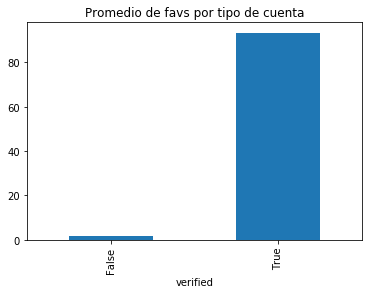

In [206]:
df_llegada.groupby('verified').favorite_count.mean().plot(kind="bar" ,title="Promedio de favs por tipo de cuenta")

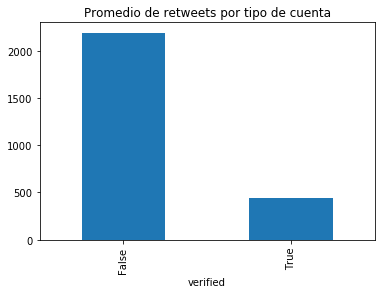

In [204]:
df_llegada.groupby('verified').retweet_count.mean().plot(kind="bar",title="Promedio de retweets por tipo de cuenta")

In [221]:
df_llegada[df_llegada.user_id == 794332 ].shape

(12, 9)

In [222]:
df_resumen = df_llegada[['user_id','verified','retweet_count','favorite_count']].groupby('user_id').sum().reset_index(drop=False)

In [226]:
df_resumen['verified'] = numpy.where(df_resumen['verified'] == True, 1,0)

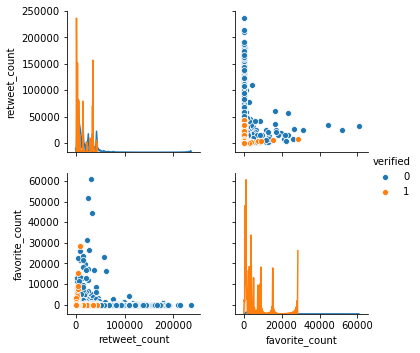

In [229]:
sns.pairplot(
    data=df_resumen,
    vars=['retweet_count', 'favorite_count'],
    hue='verified')

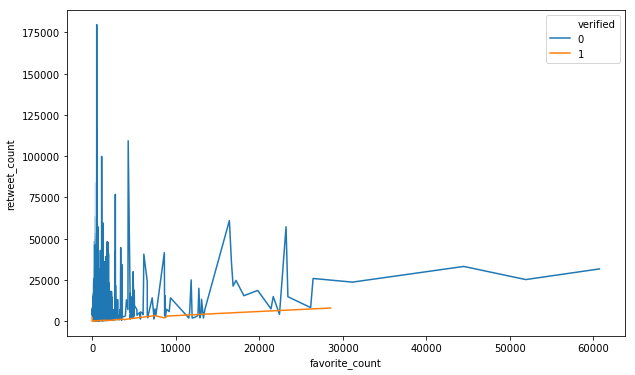

In [234]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_resumen,x='favorite_count', y='retweet_count', hue='verified')

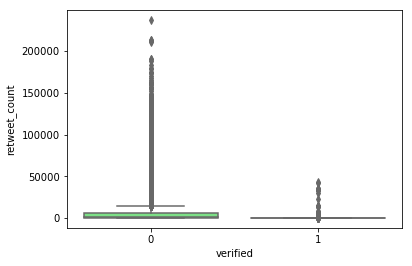

In [240]:
#df_resumen['retweet_count','favorite_count'].plot.box()

sns.boxplot(data=df_resumen, x='verified', y='retweet_count', color='#6BF178')

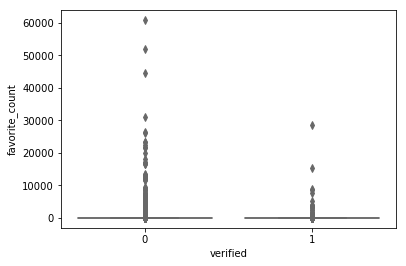

In [241]:
sns.boxplot(data=df_resumen, x='verified', y='favorite_count', color='#6BF178')

In [258]:
df_resumen[['verified','favorite_count', 'retweet_count']].groupby('verified').sum()



,favorite_count,retweet_count
verified,,
0,2104562,2537620382
1,113205,864534
